In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


Dataset Overview

Context:
Machine Learning with R" by Brett Lantz is a book that serves as an introduction to machine learning using the R language. It seems that the datasets from Packt Publishing aren't available online unless you purchase the book and set up a user account, which could be inconvenient if you're borrowing the book from a library or a friend. Although these datasets are public, they needed some refining and recoding to align with the book's format.

Contents

Columns

age: age of the primary beneficiary

sex: gender of the insurance contractor, female, male

bmi: Body Mass Index, a numerical index indicating if weight is relatively high
or low compared to height (kg / m ^ 2), ideally ranging from 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking habits

region: area of residence in the US for the beneficiary, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

## 1.Python Libraies

In [ ]:
#load the relevant libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_percentage_error,mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import neighbors
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")

## 2.Data Acquisition

In [ ]:
df=pd.read_csv("/kaggle/input/insurance/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## 3.EDA

In [ ]:
df.shape

(1338, 7)

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
######## There are no missing values in our dataset.
######## We have 3 categorical and 4 numerical variables.

In [ ]:
df.describe([0.1,0.25,0.35,0.5,0.65,0.75,0.9]).T

,count,mean,std,min,10%,25%,35%,50%,65%,75%,90%,max
age,1338.0,39.207025,14.049960,18.0000,19.000000,27.00000,31.000000,39.000,47.000000,51.000000,59.0000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,22.990000,26.29625,28.000000,30.400,32.900000,34.693750,38.6195,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.000000,0.00000,0.000000,1.000,1.000000,2.000000,3.0000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,2346.533615,4740.28715,6545.797092,9382.033,12406.182813,16639.912515,34831.7197,63770.42801


In [ ]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [ ]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
### Let's observe the information of the top and bottom 25 individuals in terms of charges.

In [ ]:
df.sort_values("charges",ascending=False)[0:25]

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.410,0,yes,southeast,63770.42801
1300,45,male,30.360,0,yes,southeast,62592.87309
1230,52,male,34.485,3,yes,northwest,60021.39897
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
34,28,male,36.400,1,yes,southwest,51194.55914
1241,64,male,36.960,2,yes,southeast,49577.66240
1062,59,male,41.140,1,yes,southeast,48970.24760
488,44,female,38.060,0,yes,southeast,48885.13561


In [ ]:
df.sort_values("charges",ascending=True)[0:25]

,age,sex,bmi,children,smoker,region,charges
940,18,male,23.21,0,no,southeast,1121.8739
808,18,male,30.14,0,no,southeast,1131.5066
1244,18,male,33.33,0,no,southeast,1135.9407
663,18,male,33.66,0,no,southeast,1136.3994
22,18,male,34.10,0,no,southeast,1137.0110
194,18,male,34.43,0,no,southeast,1137.4697
866,18,male,37.29,0,no,southeast,1141.4451
781,18,male,41.14,0,no,southeast,1146.7966
442,18,male,43.01,0,no,southeast,1149.3959
1317,18,male,53.13,0,no,southeast,1163.4627


In [ ]:
### Let's observe for the body mass index.

In [ ]:
df.sort_values("bmi",ascending=False)[:25]

,age,sex,bmi,children,smoker,region,charges
1317,18,male,53.130,0,no,southeast,1163.46270
1047,22,male,52.580,1,yes,southeast,44501.39820
847,23,male,50.380,1,no,southeast,2438.05520
116,58,male,49.060,0,no,southeast,11381.32540
286,46,female,48.070,2,no,northeast,9432.92530
1088,52,male,47.740,1,no,southeast,9748.91060
860,37,female,47.600,2,yes,southwest,46113.51100
401,47,male,47.520,1,no,southeast,8083.91980
543,54,female,47.410,0,yes,southeast,63770.42801
438,52,female,46.750,5,no,southeast,12592.53450


In [ ]:
df.sort_values("bmi",ascending=True)[:25]

,age,sex,bmi,children,smoker,region,charges
172,18,male,15.960,0,no,northeast,1694.79640
428,21,female,16.815,1,no,northeast,3167.45585
1226,38,male,16.815,2,no,northeast,6640.54485
412,26,female,17.195,2,yes,northeast,14455.64405
1286,28,female,17.290,0,no,northeast,3732.62510
1029,37,female,17.290,2,no,northeast,6877.98010
250,18,male,17.290,2,yes,northeast,12829.45510
28,23,male,17.385,1,no,northwest,2775.19215
680,21,female,17.400,1,no,southwest,2585.26900
410,19,male,17.480,0,no,northwest,1621.34020


In [ ]:
df.groupby("smoker")["age","charges"].describe().T

smoker                   no           yes
age     count   1064.000000    274.000000
        mean      39.385338     38.514599
        std       14.083410     13.923186
        min       18.000000     18.000000
        25%       26.750000     27.000000
        50%       40.000000     38.000000
        75%       52.000000     49.000000
        max       64.000000     64.000000
charges count   1064.000000    274.000000
        mean    8434.268298  32050.231832
        std     5993.781819  11541.547176
        min     1121.873900  12829.455100
        25%     3986.438700  20826.244213
        50%     7345.405300  34456.348450
        75%    11362.887050  41019.207275
        max    36910.608030  63770.428010

In [ ]:
########While the number of smokers is 274, there are 1064 non-smokers. The majority doesn't smoke.
##########Smokers have significantly higher charges compared to non-smokers.

In [ ]:
df.groupby("region")["charges"].describe().T

region,northeast,northwest,southeast,southwest
count,324.000000,325.000000,364.000000,325.000000
mean,13406.384516,12417.575374,14735.411438,12346.937377
std,11255.803066,11072.276928,13971.098589,11557.179101
min,1694.796400,1621.340200,1121.873900,1241.565000
25%,5194.322288,4719.736550,4440.886200,4751.070000
50%,10057.652025,8965.795750,9294.131950,8798.593000
75%,16687.364100,14711.743800,19526.286900,13462.520000
max,58571.074480,60021.398970,63770.428010,52590.829390


In [ ]:
### Let's create lists for categorical and numerical variables.

In [ ]:
num_list=[i for i in df.select_dtypes(["int64","float64"])]
cat_list=[i for i in df.select_dtypes("object")]

In [ ]:
num_list

['age', 'bmi', 'children', 'charges']

In [ ]:
cat_list

['sex', 'smoker', 'region']

In [ ]:
##### Let's examine the distribution of the body mass index (bmi).

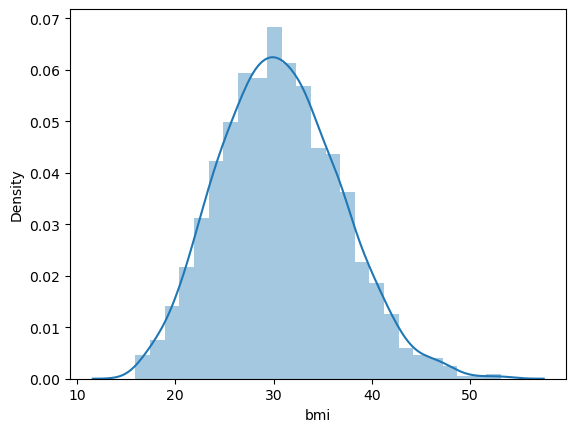

In [ ]:
sns.distplot(df.bmi);

In [ ]:

### The distribution appears to be close to a Gaussian distribution, with an average bmi around 30.

In [ ]:
######################## Let's examine the distributions of all numerical variables.

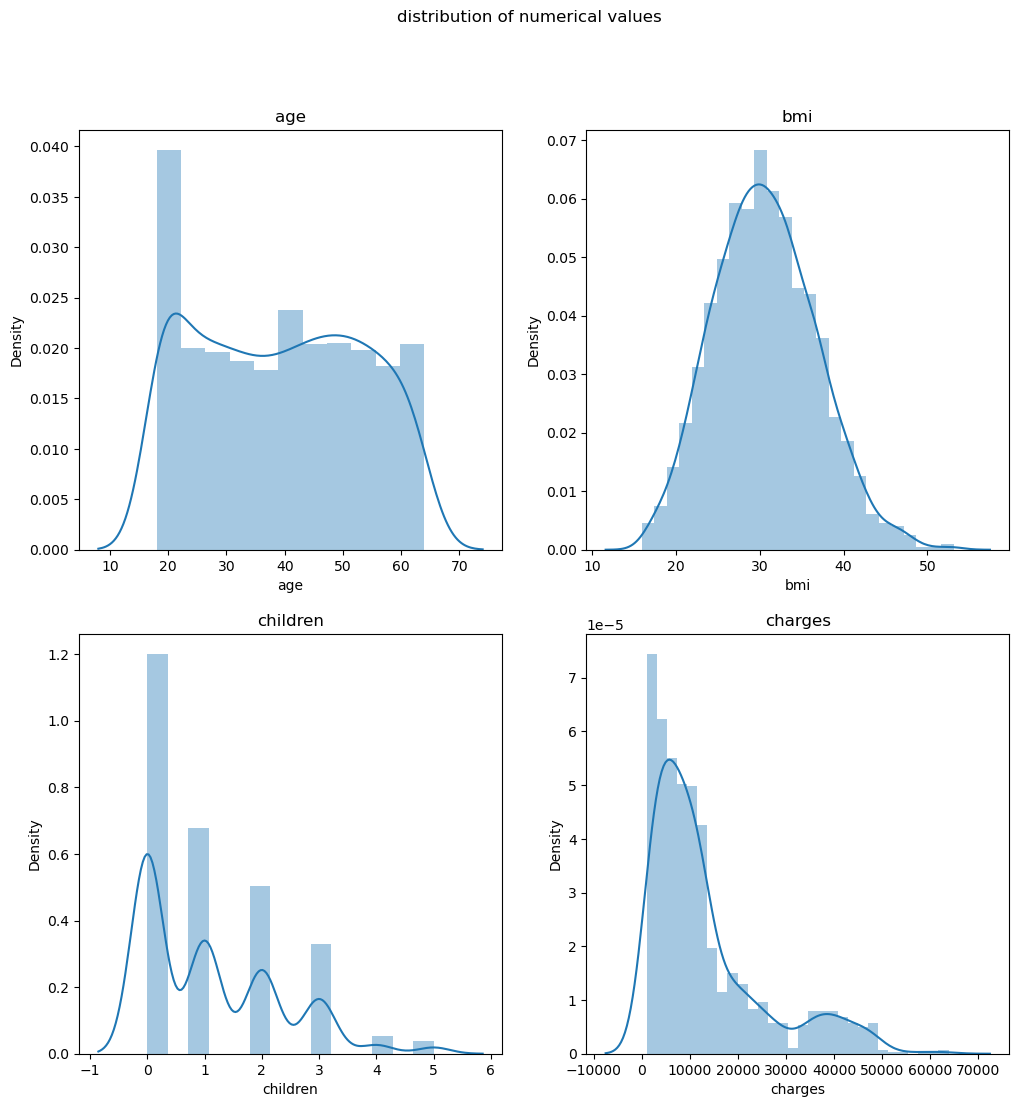

In [ ]:
k=1
plt.figure(figsize=(12,12))
plt.tight_layout()
plt.suptitle("distribution of numerical values")


for i in num_list:
    plt.subplot(2,2,k)
    sns.distplot(df[i])
    plt.title(i)
    k+=1

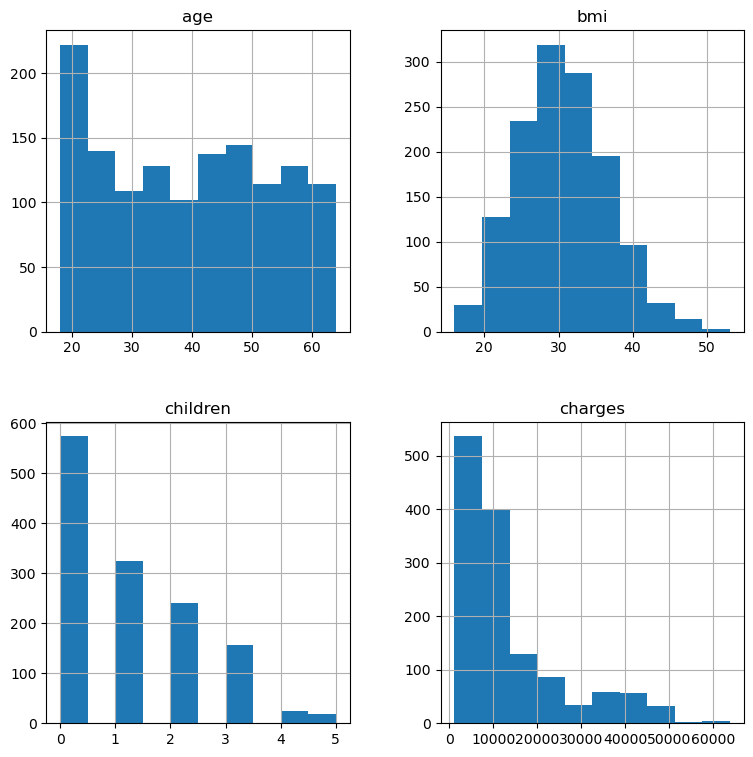

In [ ]:
######        Let's observe the histogram plots.
df.hist(figsize=(9,9));

In [ ]:

##################3BMI follows a Gaussian distribution, while the others are skewed.

In [ ]:

######## Let's observe the boxplot plots.

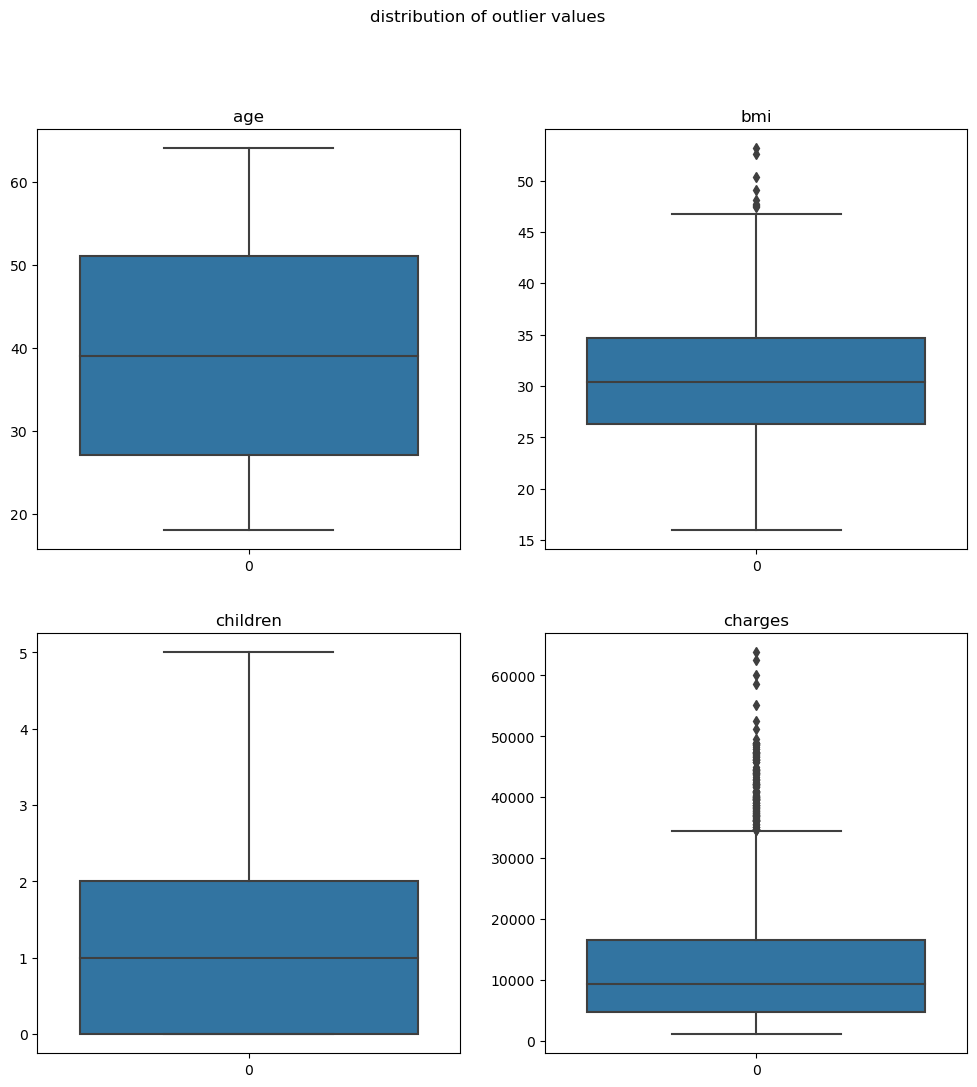

In [ ]:
k=1
plt.figure(figsize=(12,12))
plt.tight_layout()
plt.suptitle("distribution of outlier values")


for i in num_list:
    plt.subplot(2,2,k)
    sns.boxplot(df[i])
    plt.title(i)
    k+=1

In [ ]:
# 25 -------- 75

### Aykırı Değer Analizi

In [ ]:
for i in num_list:
    Q1 = df[i].quantile(0.2)
    Q3 = df[i].quantile(0.8)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if df[(df[i] > up) | (df[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

age no
bmi yes
children no
charges yes


In [ ]:

#######33 Remove outliers.

for i in num_list:

    Q1 = df[i].quantile(0.2)
    Q3 = df[i].quantile(0.8)
    IQR = Q3 - Q1
    up_lim=Q3+1.5 *IQR
    low_lim=Q1-1.5 *IQR

    df.loc[df[i]>up_lim,i]=up_lim
    df.loc[df[i]<low_lim,i]=low_lim

In [ ]:
df.describe([0.1,0.25,0.35,0.5,0.65,0.75,0.9]).T

,count,mean,std,min,10%,25%,35%,50%,65%,75%,90%,max
age,1338.0,39.207025,14.049960,18.0000,19.000000,27.00000,31.000000,39.000,47.000000,51.000000,59.0000,64.000000
bmi,1338.0,30.661612,6.091849,15.9600,22.990000,26.29625,28.000000,30.400,32.900000,34.693750,38.6195,51.661000
children,1338.0,1.094918,1.205493,0.0000,0.000000,0.00000,0.000000,1.000,1.000000,2.000000,3.0000,5.000000
charges,1338.0,13141.425996,11719.391124,1121.8739,2346.533615,4740.28715,6545.797092,9382.033,12406.182813,16639.912515,34831.7197,44664.202435


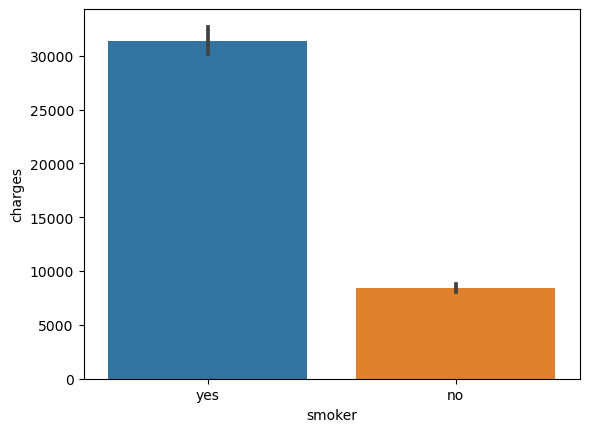

In [ ]:
sns.barplot(x="smoker", y="charges",data=df)
plt.show()

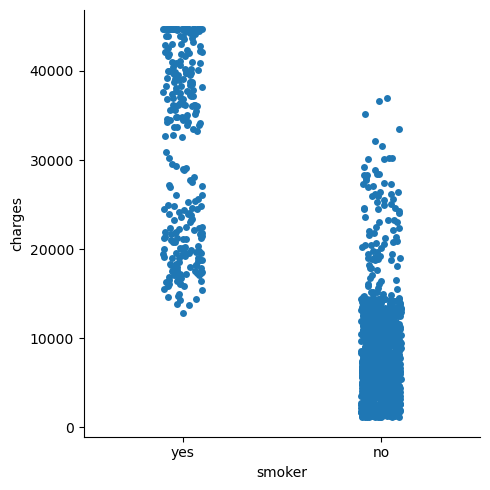

In [ ]:
sns.catplot(x="smoker", y="charges", data=df);


In [ ]:
# children-bmi ilişkisi

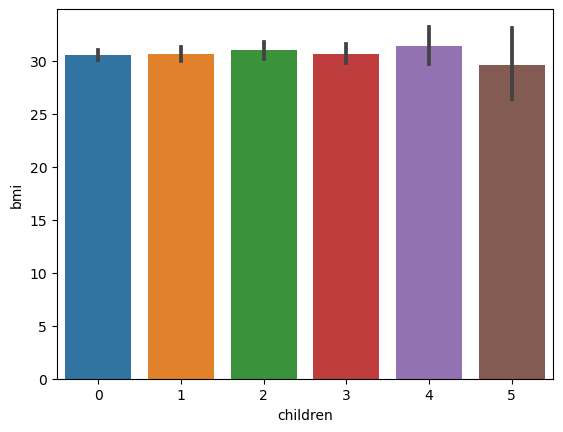

In [ ]:
sns.barplot(x="children", y="bmi",data=df)
plt.show()

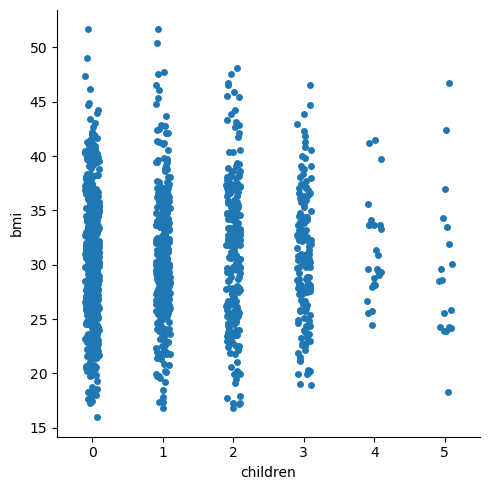

In [ ]:
sns.catplot(x="children", y="bmi", data=df);


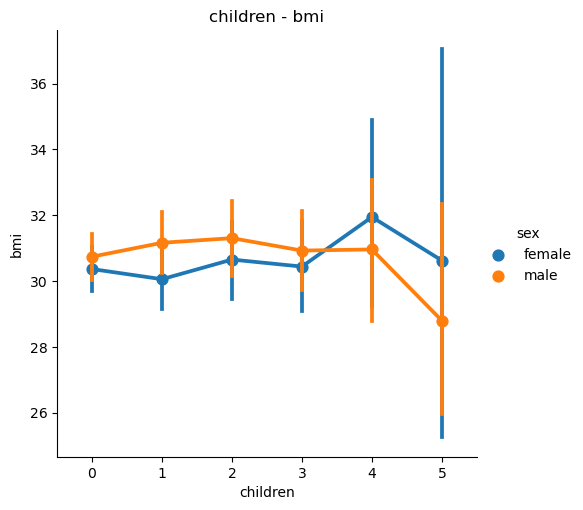

In [ ]:
sns.catplot(x="children", y="bmi", hue="sex", kind="point", data=df)
plt.title("children - bmi");

In [ ]:
#####There is no direct relationship between the two.

In [ ]:
# region-bmi smoker

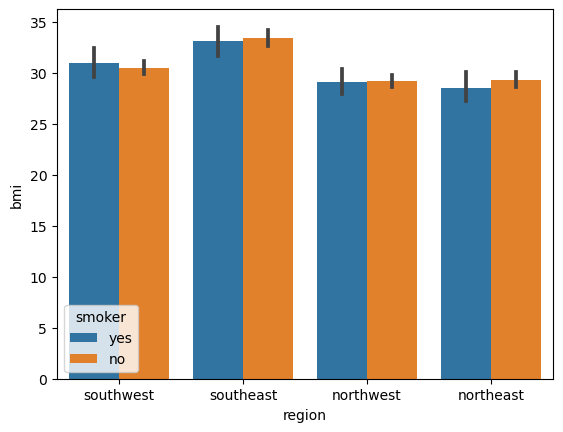

In [ ]:
sns.barplot(x="region", y="bmi",hue="smoker",data=df)
plt.show()

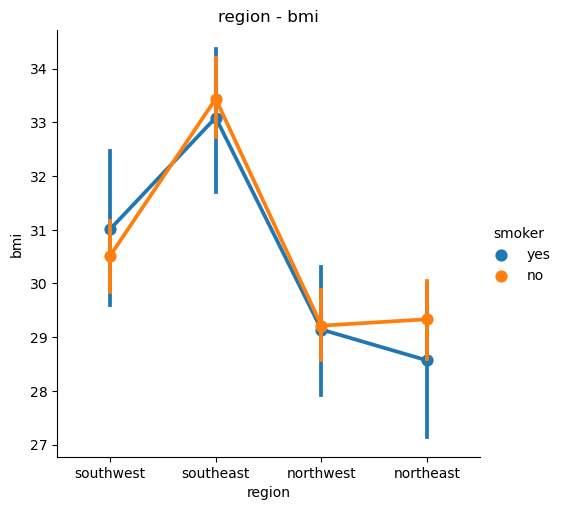

In [ ]:
sns.catplot(x="region", y="bmi", hue="smoker", kind="point", data=df)
plt.title("region - bmi");

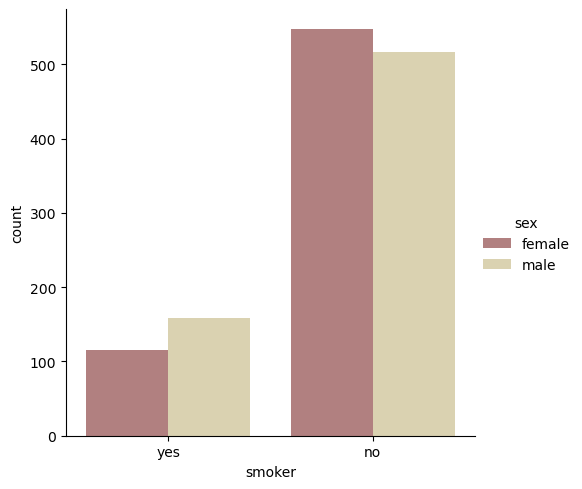

In [ ]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=df);


In [ ]:
# sex-charges

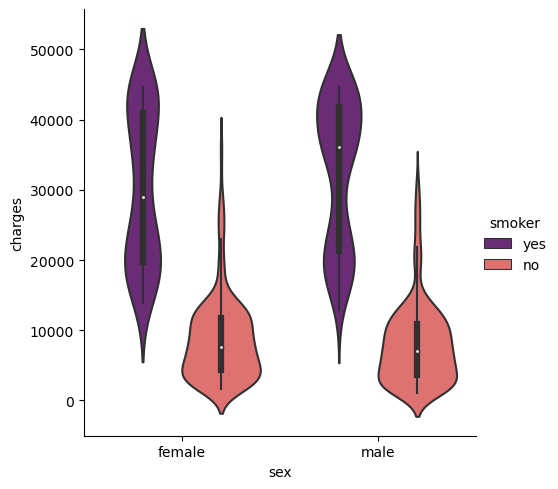

In [ ]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=df, palette = 'magma');

## 4.DataPreprocessing

In [ ]:
# encoding

In [ ]:
df[cat_list]

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [ ]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
# Label encoding tekniğini kullanalım;

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
le=LabelEncoder()

In [ ]:
df["sex"]=le.fit_transform(df["sex"])
df["smoker"]=le.fit_transform(df["smoker"])
df["region"]=le.fit_transform(df["region"])

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


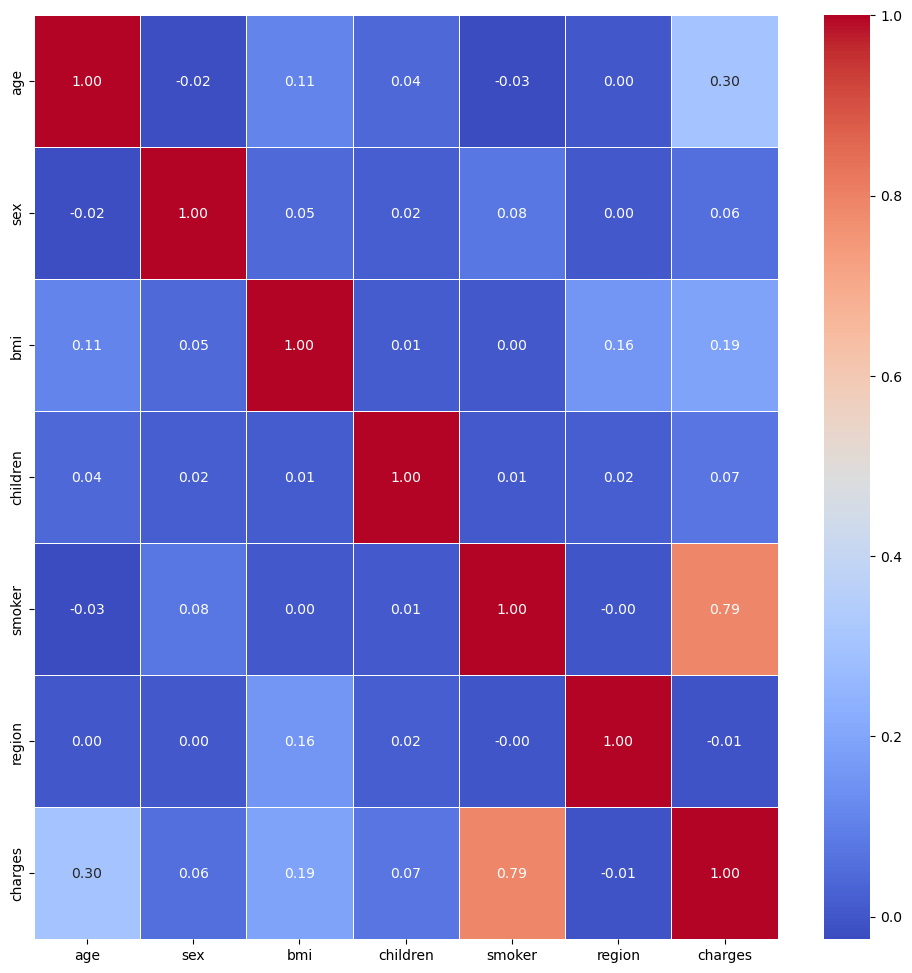

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,linewidths=0.7,fmt=".2f",cmap="coolwarm")
plt.show()


In [ ]:
cor=df.corr()["charges"].sort_values(ascending=False)
pd.DataFrame({"column":cor.index,"Correlation with charges":cor.values})

,column,Correlation with charges
0,charges,1.000000
1,smoker,0.791793
2,age,0.299981
3,bmi,0.192730
4,children,0.071257
5,sex,0.057952
6,region,-0.008044


## 5.                          *Model*

In [ ]:
X=df.drop("charges",axis=1)
y=df["charges"]

In [ ]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [ ]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [ ]:
!pip install catboost


In [ ]:
!pip install xgboost

In [ ]:
!pip install lightgbm


In [ ]:
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [ ]:
ridge=Ridge().fit(X_train,y_train)
lasso=Lasso().fit(X_train,y_train)
enet=ElasticNet().fit(X_train,y_train)
knn=KNeighborsRegressor().fit(X_train,y_train)
ada=AdaBoostRegressor().fit(X_train,y_train)
svm=SVR().fit(X_train,y_train)
mlpc=MLPRegressor().fit(X_train,y_train)
dtc=DecisionTreeRegressor().fit(X_train,y_train)
rf=RandomForestRegressor().fit(X_train,y_train)
xgb=XGBRegressor().fit(X_train,y_train)
gbm=GradientBoostingRegressor().fit(X_train,y_train)
lgb=LGBMRegressor().fit(X_train,y_train)
catbost=CatBoostRegressor().fit(X_train,y_train)

Learning rate set to 0.041383
0:	learn: 11236.8701862	total: 56.7ms	remaining: 56.6s
1:	learn: 10906.1208725	total: 57.5ms	remaining: 28.7s
2:	learn: 10593.5307460	total: 58ms	remaining: 19.3s
3:	learn: 10294.6059352	total: 58.7ms	remaining: 14.6s
4:	learn: 9987.3128795	total: 59.3ms	remaining: 11.8s
5:	learn: 9698.4638534	total: 60ms	remaining: 9.94s
6:	learn: 9434.3555969	total: 60.6ms	remaining: 8.59s
7:	learn: 9178.4350133	total: 61.2ms	remaining: 7.59s
8:	learn: 8929.0079531	total: 61.7ms	remaining: 6.8s
9:	learn: 8704.2685791	total: 62.3ms	remaining: 6.17s
10:	learn: 8491.1217760	total: 62.6ms	remaining: 5.63s
11:	learn: 8277.7914035	total: 63.2ms	remaining: 5.2s
12:	learn: 8091.7649720	total: 63.8ms	remaining: 4.84s
13:	learn: 7898.8830673	total: 64ms	remaining: 4.51s
14:	learn: 7720.3200526	total: 64.6ms	remaining: 4.24s
15:	learn: 7556.5207034	total: 64.9ms	remaining: 3.99s
16:	learn: 7377.4450733	total: 65.5ms	remaining: 3.79s
17:	learn: 7213.9534412	total: 66.1ms	remaining: 

In [ ]:
models=[ridge,lasso,enet,knn,ada,svm,mlpc,dtc,rf,xgb,gbm,lgb,catbost]

In [ ]:
def ML(y,models):
    y_pred=models.predict(X_test)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    mape=mean_absolute_percentage_error(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    return rmse,mape,mae


In [ ]:
for i in models:
     print(i,"Algorithm succed rate :",ML("charges",i))


Ridge() Algorithm succed rate : (5390.42433494833, 0.3921468759551937, 3789.5054269617935)
Lasso() Algorithm succed rate : (5386.044354160073, 0.3899875001720824, 3776.2509661169556)
ElasticNet() Algorithm succed rate : (9200.427827293683, 0.9177646976105694, 7160.138650174177)
KNeighborsRegressor() Algorithm succed rate : (10725.654020061596, 0.8343158785565414, 7416.4407141417905)
AdaBoostRegressor() Algorithm succed rate : (4532.253641972729, 0.6223111848896131, 3642.0036183488633)
SVR() Algorithm succed rate : (12784.931055807527, 0.9734459567073241, 8406.851865215009)
MLPRegressor() Algorithm succed rate : (11907.221785310594, 0.7945577093774574, 7584.791081369299)
DecisionTreeRegressor() Algorithm succed rate : (6914.987044461861, 0.47337425124719107, 3457.3407944365676)
RandomForestRegressor() Algorithm succed rate : (4284.845858569191, 0.33861340645117566, 2560.077032270181)
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsamp

In [ ]:
# Birde verilerimizi standartlaştıralım sonuçları öyle gözlemleyelim

In [ ]:
X_train2,X_test2,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [ ]:

sc=StandardScaler()
X_train2=sc.fit_transform(X_train2)
X_test2=sc.transform(X_test2)


In [ ]:
X_train2

array([[-0.14853305,  1.01506676,  0.54635376,  2.41394802,  1.97125461,
         1.30906493],
       [-1.49780784,  1.01506676,  0.59978807, -0.89219519, -0.50729114,
         0.40480446],
       [-1.14273553, -0.98515688,  0.96249367,  0.76087642,  1.97125461,
        -1.4037165 ],
       ...,
       [ 0.06451033,  1.01506676, -0.91418397, -0.89219519, -0.50729114,
         0.40480446],
       [-1.42679338,  1.01506676,  0.77790243, -0.89219519, -0.50729114,
        -0.49945602],
       [-0.4325909 , -0.98515688, -1.97963167, -0.06565939, -0.50729114,
         1.30906493]])

In [ ]:
ridge2=Ridge().fit(X_train2,y_train)
lasso2=Lasso().fit(X_train2,y_train)
enet2=ElasticNet().fit(X_train2,y_train)
knn2=KNeighborsRegressor().fit(X_train2,y_train)
ada2=AdaBoostRegressor().fit(X_train2,y_train)
svm2=SVR().fit(X_train2,y_train)
mlpc2=MLPRegressor().fit(X_train2,y_train)
dtc2=DecisionTreeRegressor().fit(X_train2,y_train)
rf2=RandomForestRegressor().fit(X_train2,y_train)
xgb2=XGBRegressor().fit(X_train2,y_train)
gbm2=GradientBoostingRegressor().fit(X_train2,y_train)
lgb2=LGBMRegressor().fit(X_train2,y_train)
catbost2=CatBoostRegressor().fit(X_train2,y_train)

Learning rate set to 0.041383
0:	learn: 11236.8701862	total: 863us	remaining: 863ms
1:	learn: 10906.1208725	total: 1.63ms	remaining: 811ms
2:	learn: 10593.5307460	total: 2.45ms	remaining: 814ms
3:	learn: 10294.6059352	total: 3.26ms	remaining: 812ms
4:	learn: 9987.3128795	total: 3.91ms	remaining: 779ms
5:	learn: 9698.4638534	total: 4.65ms	remaining: 771ms
6:	learn: 9434.3555969	total: 5.32ms	remaining: 755ms
7:	learn: 9178.4350133	total: 5.97ms	remaining: 741ms
8:	learn: 8929.0079531	total: 6.63ms	remaining: 730ms
9:	learn: 8704.2685791	total: 7.2ms	remaining: 713ms
10:	learn: 8491.1217760	total: 7.45ms	remaining: 670ms
11:	learn: 8277.7914035	total: 8.03ms	remaining: 661ms
12:	learn: 8091.7649720	total: 8.63ms	remaining: 656ms
13:	learn: 7898.8830673	total: 8.94ms	remaining: 630ms
14:	learn: 7720.3200526	total: 9.71ms	remaining: 638ms
15:	learn: 7556.5207034	total: 10.1ms	remaining: 619ms
16:	learn: 7377.4450733	total: 10.7ms	remaining: 621ms
17:	learn: 7213.9534412	total: 11.4ms	remai

In [ ]:
models=[ridge2,lasso2,enet2,knn2,ada2,svm2,mlpc2,dtc2,rf2,xgb2,gbm2,lgb2,catbost2]

In [ ]:
def ML(y,models):
    y_pred=models.predict(X_test2)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    mape=mean_absolute_percentage_error(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    return rmse,mape,mae


In [ ]:
for i in models:
     print(i,"Algorithm succed rate :",ML("charges",i))


Ridge() Algorithm succed rate : (5386.748641463622, 0.3903502591894787, 3777.9044246904077)
Lasso() Algorithm succed rate : (5386.04915610516, 0.3899509923681095, 3775.857984351037)
ElasticNet() Algorithm succed rate : (6699.363095708165, 0.6894526882741933, 4998.717897595166)
KNeighborsRegressor() Algorithm succed rate : (4642.759451412229, 0.3583640655258952, 2950.2118876791046)
AdaBoostRegressor() Algorithm succed rate : (4606.739357986003, 0.6535697405428647, 3678.477475636772)
SVR() Algorithm succed rate : (12766.179821662969, 0.9794215686839329, 8411.820285007194)
MLPRegressor() Algorithm succed rate : (17623.970143921422, 0.9679851200918295, 13002.776767008163)
DecisionTreeRegressor() Algorithm succed rate : (7121.601554206022, 0.5222128714759672, 3633.510595798507)
RandomForestRegressor() Algorithm succed rate : (4183.505666797924, 0.3413772242903656, 2478.7152826529555)
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_b

## 6. Tuning Hyperparameters


### GBM

### Gridsearchcv

In [ ]:
gbm?

Type:        GradientBoostingRegressor
String form: GradientBoostingRegressor()
Length:      100
File:        /opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py
Docstring:  
Gradient Boosting for regression.

This estimator builds an additive model in a forward stage-wise fashion; it
allows for the optimization of arbitrary differentiable loss functions. In
each stage a regression tree is fit on the negative gradient of the given
loss function.

:class:`sklearn.ensemble.HistGradientBoostingRegressor` is a much faster
variant of this algorithm for intermediate datasets (`n_samples >= 10_000`).

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'squared_error', 'absolute_error', 'huber', 'quantile'},             default='squared_error'
    Loss function to be optimized. 'squared_error' refers to the squared
    error for regression. 'absolute_error' refers to the absolute error of
    regression and is a robust loss function. 'huber' is a

In [ ]:
gbm_params={
    "learning_rate":[0.1,0.01,0.3,0.03],
    "n_estimators":[100,200,250],
    "min_samples_split":[2,3,4],
    "max_depth":[2,3,4]


}

In [ ]:
grid_cv=GridSearchCV(gbm,gbm_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=2, min_s

In [ ]:
grid_cv.best_params_

{'learning_rate': 0.03,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
gbm_tun=GradientBoostingRegressor(**grid_cv.best_params_).fit(X_train,y_train)

In [ ]:
y_pred=gbm_tun.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

3876.840736221381

In [ ]:
mean_absolute_percentage_error(y_test,y_pred)

0.3091029074798569

In [ ]:
# Randomized Searchcv

In [ ]:
param_dist = {
    'n_estimators': np.arange(50, 251, 10),
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': np.arange(3, 11),
    'min_samples_split': np.arange(2, 21),
    'min_samples_leaf': np.arange(1, 21),
    'max_features': [None, 'sqrt', 'log2']
}


In [ ]:
random_search = RandomizedSearchCV(gbm, param_distributions=param_dist, n_iter=100,cv=5, verbose=2, random_state=42, n_jobs=-1).fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END learning_rate=0.01, max_depth=8, max_features=None, min_samples_leaf=6, min_samples_split=14, n_estimators=160; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=8, max_features=None, min_samples_leaf=6, min_samples_split=14, n_estimators=160; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=8, max_features=None, min_samples_leaf=6, min_samples_split=14, n_estimators=160; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=8, max_features=None, min_samples_leaf=6, min_samples_split=14, n_estimators=160; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=8, max_features=None, min_samples_leaf=6, min_samples_split=14, n_estimators=160; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=7, max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=210; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=7, max_features=None, min_samples_leaf=3, min_samples_split=3

In [ ]:
best_params = random_search.best_params_

print("En iyi parametreler:", best_params)


En iyi parametreler: {'n_estimators': 80, 'min_samples_split': 18, 'min_samples_leaf': 19, 'max_features': None, 'max_depth': 3, 'learning_rate': 0.1}


In [ ]:
random_search.best_params_

{'n_estimators': 80,
 'min_samples_split': 18,
 'min_samples_leaf': 19,
 'max_features': None,
 'max_depth': 3,
 'learning_rate': 0.1}

In [ ]:
gbm_tun2=GradientBoostingRegressor(**random_search.best_params_).fit(X_train,y_train)

In [ ]:
y_pred=gbm_tun2.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

3920.241482134737

In [ ]:
mean_absolute_percentage_error(y_test,y_pred)

0.30464516647985695

In [ ]:
!pip install optuna

In [ ]:
import optuna
from optuna import Trial,visualization,trial
from optuna.samplers import TPESampler

In [ ]:
def return_score(param):
    model=GradientBoostingRegressor(**param).fit(X_train,y_train)
    y_pred=model.predict(X_test)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    mape=mean_absolute_percentage_error(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)


    return rmse,mape,mae

In [ ]:
def objective(trial):
    param={
        "n_estimators":trial.suggest_int("n_estimators",10,500),
        "max_depth":trial.suggest_int("max_depth",2,15),
        "learning_rate":trial.suggest_loguniform("learning_rate",0.05,0.7),
        "min_samples_split":trial.suggest_int("min_samples_split",2,20),
        "min_samples_leaf":trial.suggest_int("min_samples_leaf",1,20)


    }
    return(return_score(param))


In [ ]:
study=optuna.create_study(direction="maximize")
study.optimize(objective,n_trials=400)



[I 2023-08-26 09:18:51,095] A new study created in memory with name: no-name-db0ff7dc-05f2-4494-a017-0a41f3845ad8
[W 2023-08-26 09:18:51,247] Trial 0 failed with parameters: {'n_estimators': 60, 'max_depth': 15, 'learning_rate': 0.29007677752960814, 'min_samples_split': 8, 'min_samples_leaf': 19} because of the following error: The number of the values 3 did not match the number of the objectives 1..
[W 2023-08-26 09:18:51,248] Trial 0 failed with value (4570.379841435037, 0.3974383888902076, 2968.677020600913).
[W 2023-08-26 09:18:51,788] Trial 1 failed with parameters: {'n_estimators': 256, 'max_depth': 9, 'learning_rate': 0.07670829198624561, 'min_samples_split': 4, 'min_samples_leaf': 15} because of the following error: The number of the values 3 did not match the number of the objectives 1..
[W 2023-08-26 09:18:51,789] Trial 1 failed with value (4370.326308487052, 0.36387777324694975, 2771.759361801915).
[W 2023-08-26 09:18:52,110] Trial 2 failed with parameters: {'n_estimators': 